# 9. Advanced examples: cellpose and napari

After having presented the basic tools needed to do image processing in Python, we explore two additional topics here: usage of an advanced package for segmentation, and multi-dimensional viewing and exploration. In the first part we learn how to use the package cellpose for cell segmentation, insisting in particular on how one proceeds to use a new software. In the second part, we explore napari an interactive multi-dimensional viewer that can easily be extended via your own plugins.

## cellpose

In the previous chapters we have seen a classic solution for segmentation. Those tools stay entirely relevant as very often one needs them as a complement even when using more advanced methods. Here we show an example of such an advanced method with [cellpose](http://www.cellpose.org/). Cellpose is a generalistic cell segmentation tool based on Deep Learning. It is generalistic because it has been trained on a vast amount of different types of images and is therefore very versatile. So much that it can also be used outside the specific field of bioimaging. Let's see how to proceed.

### Installation

When you work on a project, you might search for packages to solve a specific project. Once you have found one you will need to first install it. You usually find installation instruction in the GitHub repository of the package or its documentation. For example here, you can find some instructions in the [Readme](https://github.com/mouseland/cellpose#local-installation).

We strongly recommend that you work within an **environment** for your project, i.e. a "closed" space that contains all the package needed for a given project. This avoids version issues when you start mixing various complex software with different dependencies. Such an environment can typically be created with conda ([miniconda](https://docs.conda.io/en/latest/miniconda.html) with a command line tool, [Anaconda](https://www.anaconda.com/) with a user interface). If you use such an environment then you can safely install new software for testing, as you can easily start over with a fresh environment is something goes bad.

So now you have discovered cellpose and need to install it. Following the instructions, you have found that you can obtain the software from [pypi](https://pypi.org/project/cellpose/). You can either install form the command line or directly in your notebook:

In [1]:
pip install cellpose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.4/174.4 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.4/632.4 KB 5.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 2.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.2
    Uninstalling numpy-1.22.2:
      Successfully uninstalled numpy-1.22.2
Note: you may need to restart the kernel to use updated packages.


Here we see that the installation was successful.

### Using the software

Now we can go the documentation and search for an example. Cellpose offers an [example](https://cellpose.readthedocs.io/en/latest/notebook.html) to run within a notebook. First we need to import the right part of the package:

In [1]:
from cellpose import models

The next step is to use the segmentation model. In the example we see ```model = models.Cellpose(gpu=False, model_type='cyto')```. The question is: does this work in our case? What does ```cyto``` mean? To understand these options, you will have to read a bit the documentation or the API (the list of all possible functions of the package to which you have access). In this case the models are explained in the [documentation](https://cellpose.readthedocs.io/en/latest/settings.html#channels).

Let us remember what type of image we have by plotting one:

In [2]:
import skimage.io
import matplotlib.pyplot as plt

In [3]:
image = skimage.io.imread('images/19838_1252_F8_1.tif')

In [4]:
image.shape

(2048, 2048, 3)

The image is relatively large and it could take a long time to analyze it on a regular computer with a DL method. So we first downscale it:

In [5]:
image = image[::4, :: 4, :]

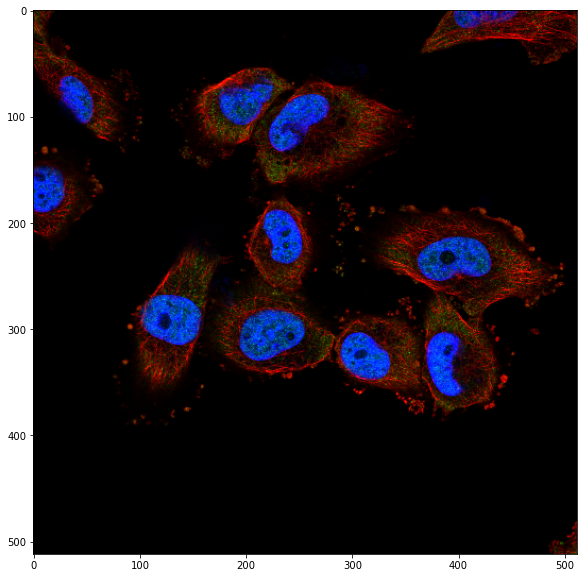

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image);

So we have a marker for the nucleus (blue) and one for the cytosplasm (red). From the documentation, we understand that in that case we can use the ```cyto``` model and use the blue nucleus channel as a "help" for cell segmentation.

In [7]:
model = models.Cellpose(model_type='cyto')

To use the model properly, we have to specify channels like this ```channels=[1,3]``` where 1 stand for the red channel (**R**GB) and 3 for the blue one (RG**B**).

Let's try now by copying the command:

In [8]:
channels=[[1,3]]
masks, flows, styles, diams = model.eval(image, diameter=None, channels=channels)

Let's look at the mask superposed on the image:

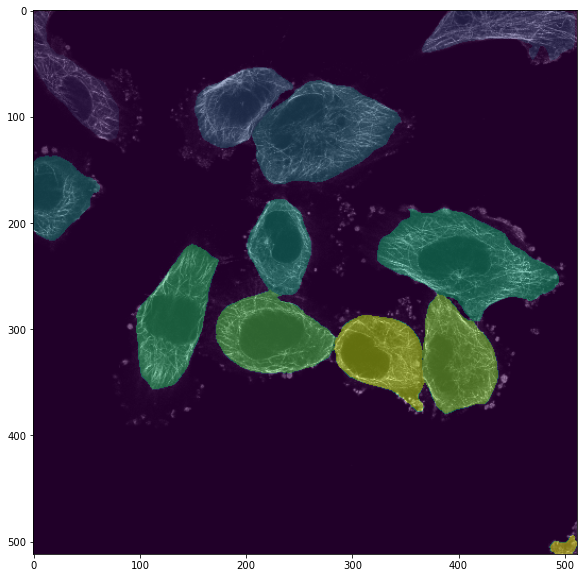

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image[:,:,0], cmap='gray')
ax.imshow(masks, alpha=0.5);

Not bad for a first trial! Even touching cells get properly segmented which could be difficult to achieve with classical methods. Now we could refine this result by further reading the documentation and seeing that we could provide a diameter estimate:

In [10]:
masks, flows, styles, diams = model.eval(image, diameter=100, channels=channels)

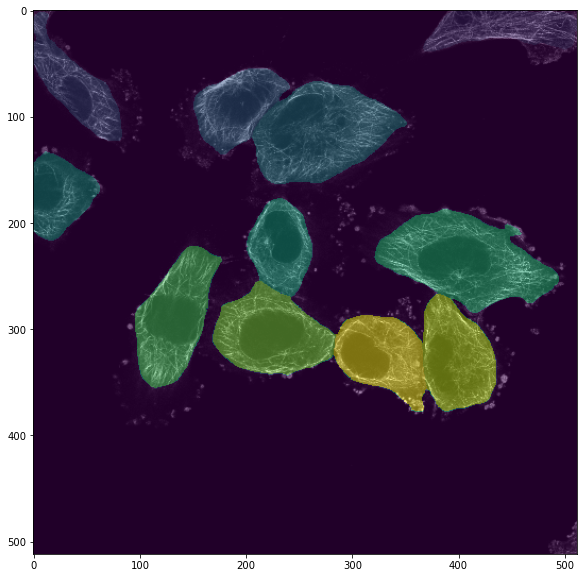

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image[:,:,0], cmap='gray')
ax.imshow(masks, alpha=0.5);

We could also segment the nuclei using another [model type](https://cellpose.readthedocs.io/en/latest/settings.html#nucleus-model-nuclei):

In [12]:
model = models.Cellpose(model_type='nuclei')

channels = [3,0]
masks, flows, styles, diams = model.eval(image, diameter=100, channels=channels)

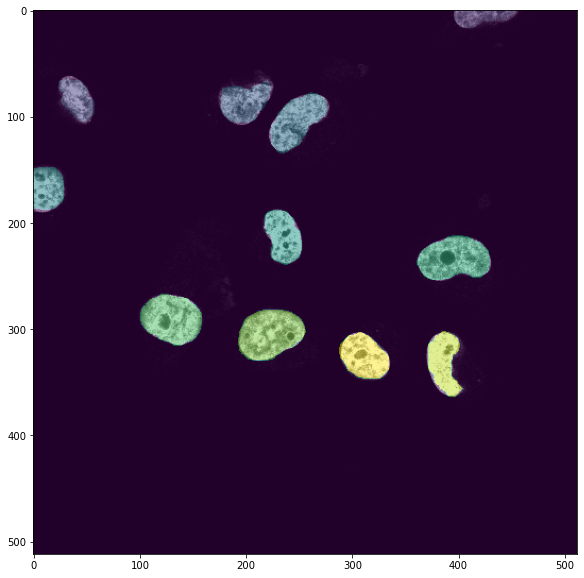

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image[:,:,2], cmap='gray')
ax.imshow(masks, alpha=0.5);

## napari

To display images, we have until now only used Matplotlib. It allows to have a quick look at an image or to create highgly customized figures for publications but it is limited in interactivity, in particular to visualize multi-dimensional data. napari has been created to fill this void: it provides in the Python eco-system a multi-dimensional viewer which is interactive and highly customizable via a plugin system.

napari can be installed like any other package via pip or conda, but you can also download it as a standalone application. Once installed you can use it as an application and use an editor integrated to it or you can run the software from a notebook. Note that napari doesn't display *in* the notebook but in a separate figure, making it unusable in Google Colab.

Let's first import the package:

In [14]:
import napari
from napari.utils import nbscreenshot

The first thing we have to do is to create the ```viewer```. Once we have a viewer, we can interact with it both via the interface and programmatically via methods attached to it. **Only on renku, you first have to create a desktop (Launcher -> VNC) and then run the following cell for napari to work**:

In [ ]:
import os
os.environ['DISPLAY'] = ':1.0'

Now we create the viewer:

In [15]:
viewer = napari.Viewer()

Below we see the napari viewer: an area on the right where images are viewed, and an interactive menu on the left.

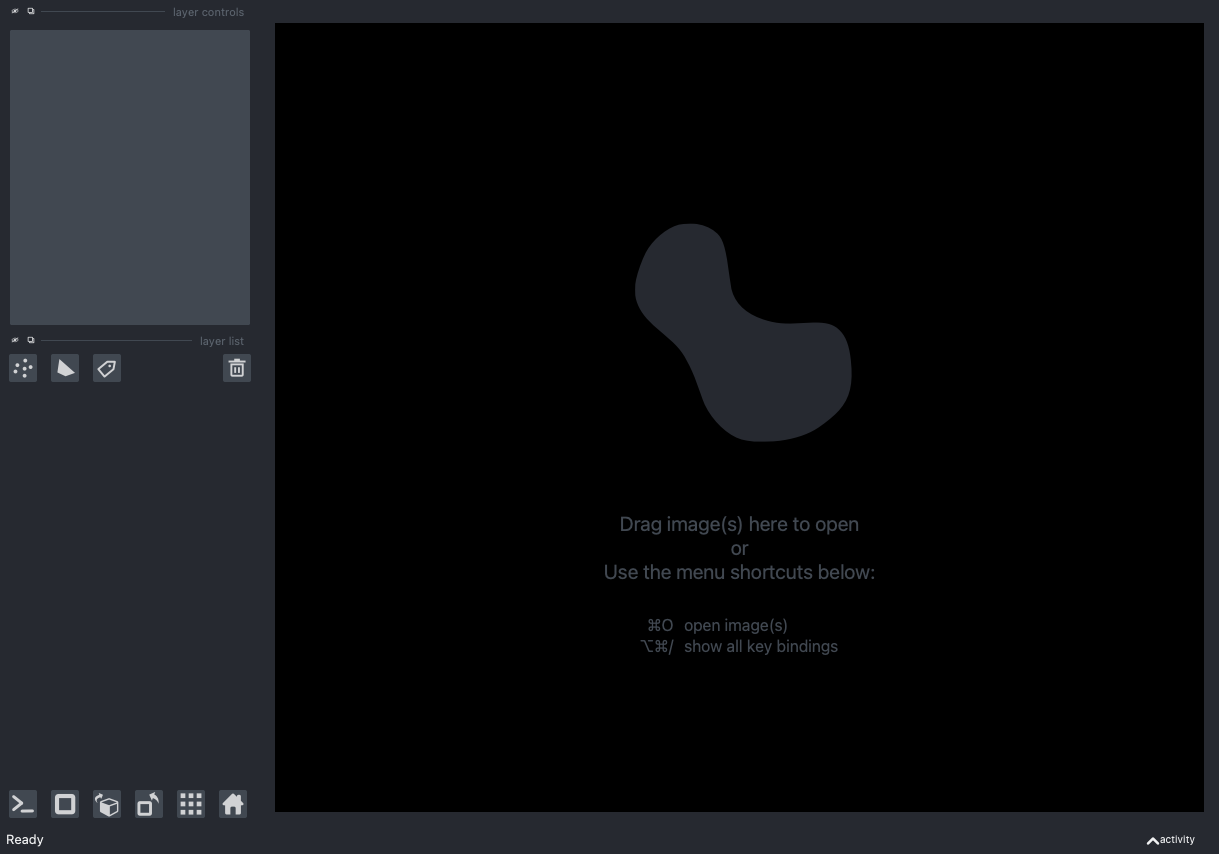

In [16]:
nbscreenshot(viewer)

Now we can add an image to the viewer. We use here options to select a colormap and to give a name to each channel:

In [17]:
viewer.add_image(image[:,:,0], colormap='red', name='cytoplasm')
viewer.add_image(image[:,:,1], colormap='green', name='signal')
viewer.add_image(image[:,:,2], colormap='blue', name='nuclei');

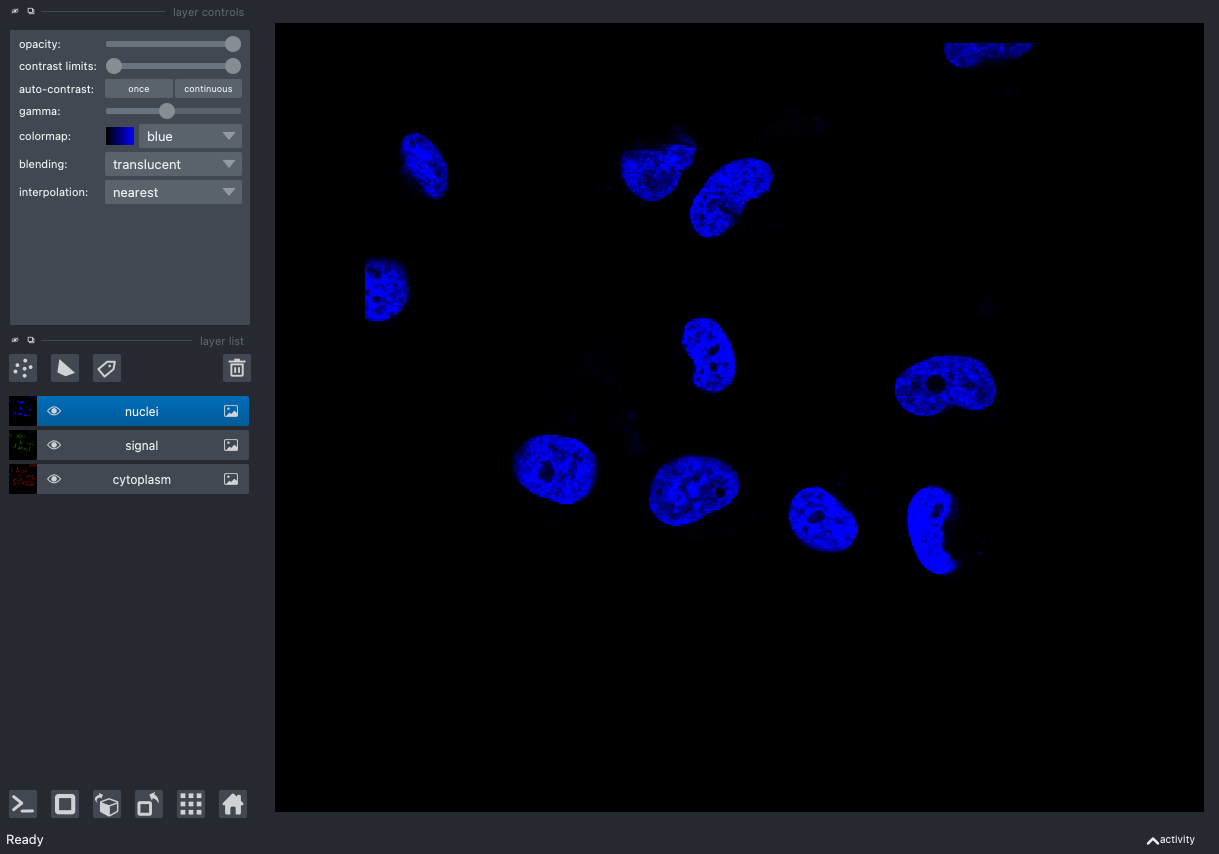

In [18]:
nbscreenshot(viewer)

We see now a list of layers appearing on the left. napari works with such layers that can be superposed and which can be of different types. The type of layer can be selected when adding data. For example we can add labels now:

In [19]:
viewer.add_labels(masks);

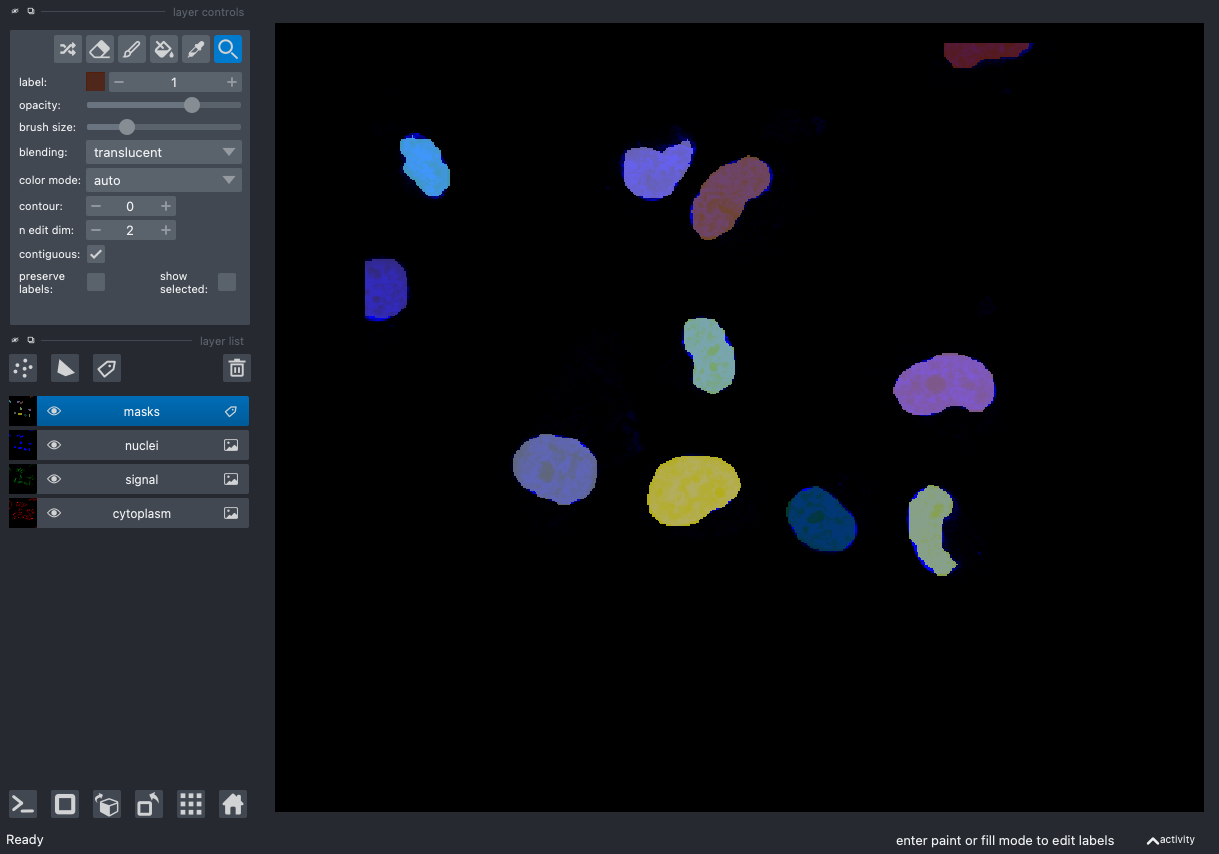

In [20]:
nbscreenshot(viewer)

Each layer type has its own options. For example here in the labels layer, we can choose the currently selected label, set opacity etc. We also have a set of tools to interactively work on the layer. By selecting the pencil or the eraser, we can edit the labels:

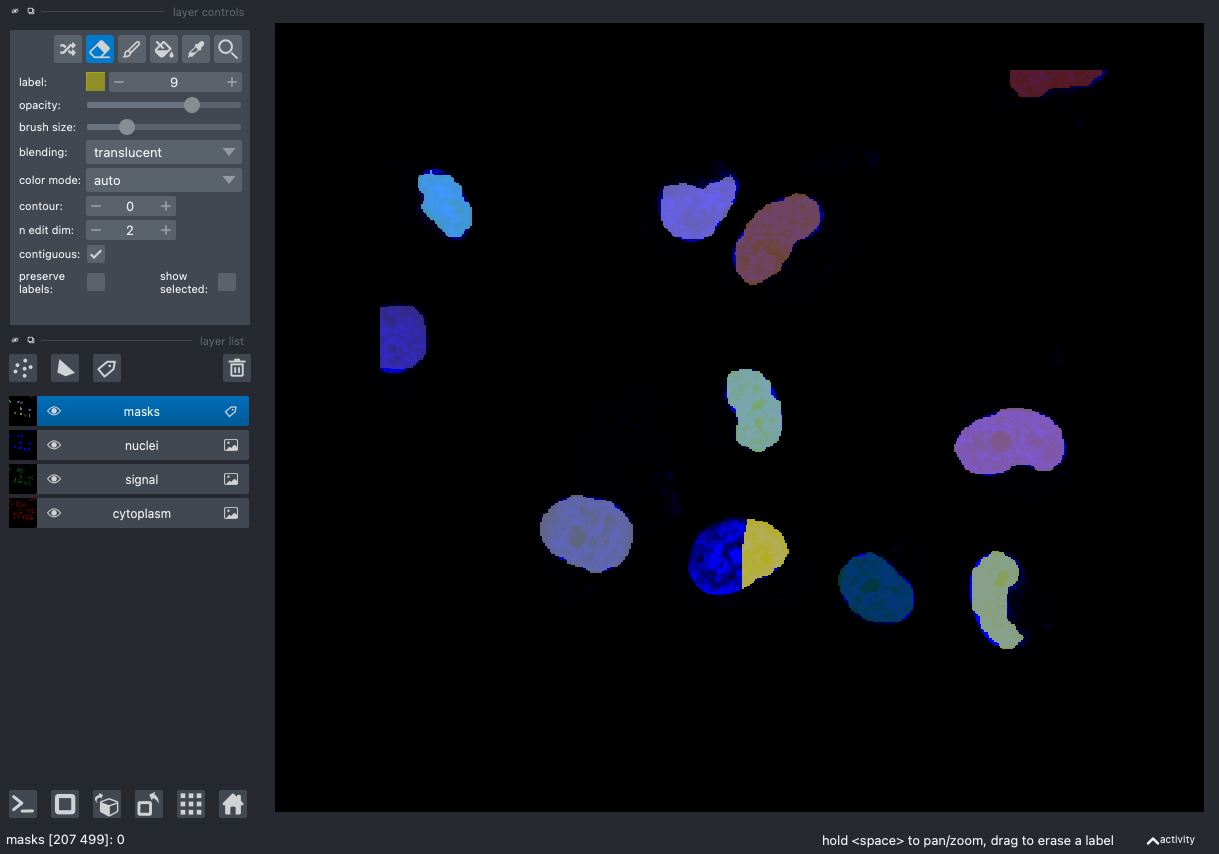

In [23]:
nbscreenshot(viewer)

This was just a very brief insight into this very useful software. To learn more, visit the various tutorials on the [napari web-site](https://napari.org/index.html).

### napari plugins

napari is integrated with a very efficient plugin system. You can find a list of plugins on the [napari-hub](https://www.napari-hub.org/) and install them directly from the interface (menu Plugin). For example you can find an animation plugin to create animations in your viewer:

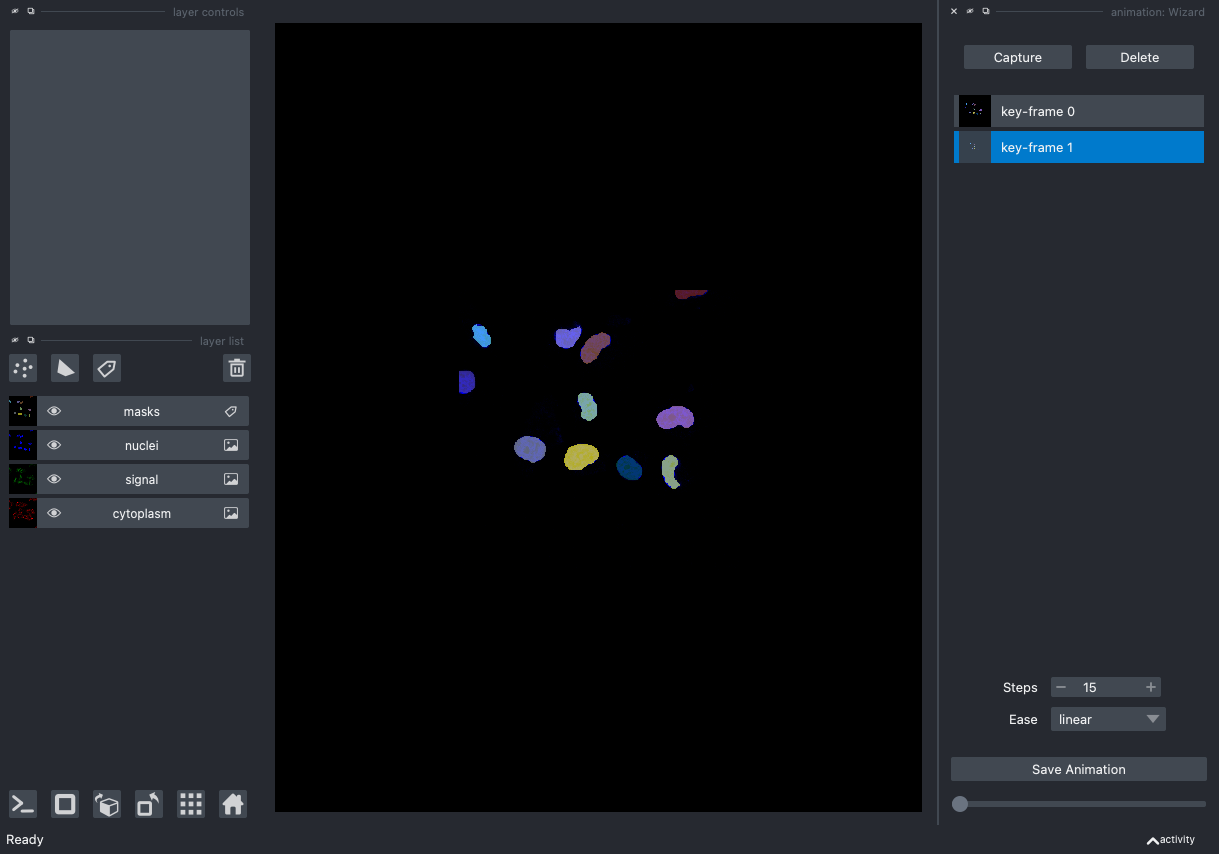

In [22]:
nbscreenshot(viewer)

You can also very easily add interactivity to napari yourself. For example let's imagine that you'd like to have a little GUI to do some thresholding. For this you write your thresholding function, add some annotations to it and then you can use a package called magicgui to turn the function into an interactive widget:

In [26]:
import skimage
from magicgui import magicgui
from napari.types import ImageData, LabelsData

In [28]:
def my_thresholder(image: ImageData, th_level: int=0) -> LabelsData: 
    
    label_image = image > th_level
    label_image = skimage.morphology.label(label_image)
    
    return(label_image)

thresholding_widget = magicgui(my_thresholder)

Now we can add the widget to the viewer:

In [29]:
viewer.window.add_dock_widget(thresholding_widget, area='right')

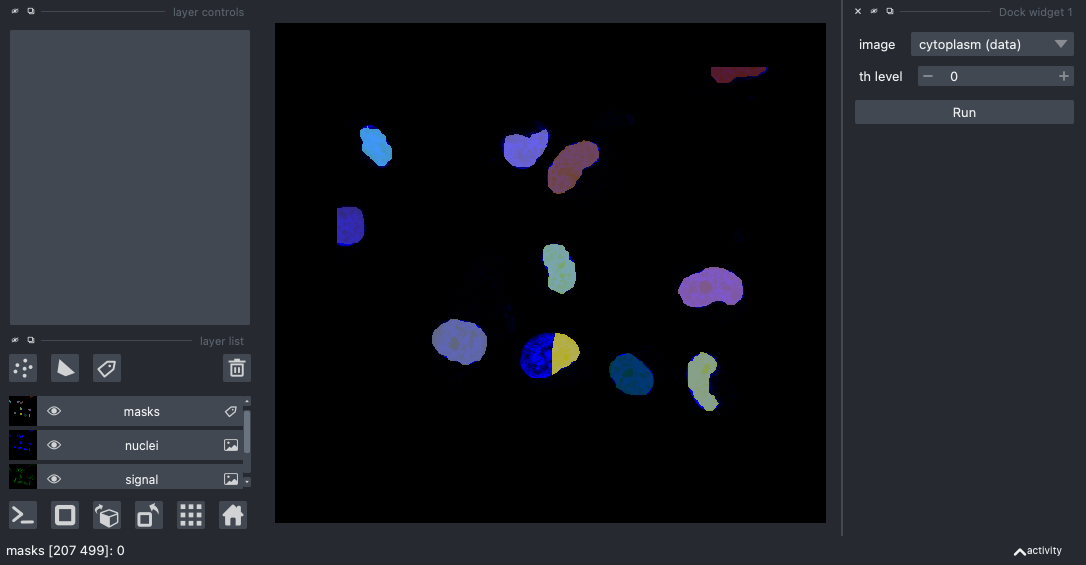

In [30]:
nbscreenshot(viewer)

And we can run the function:

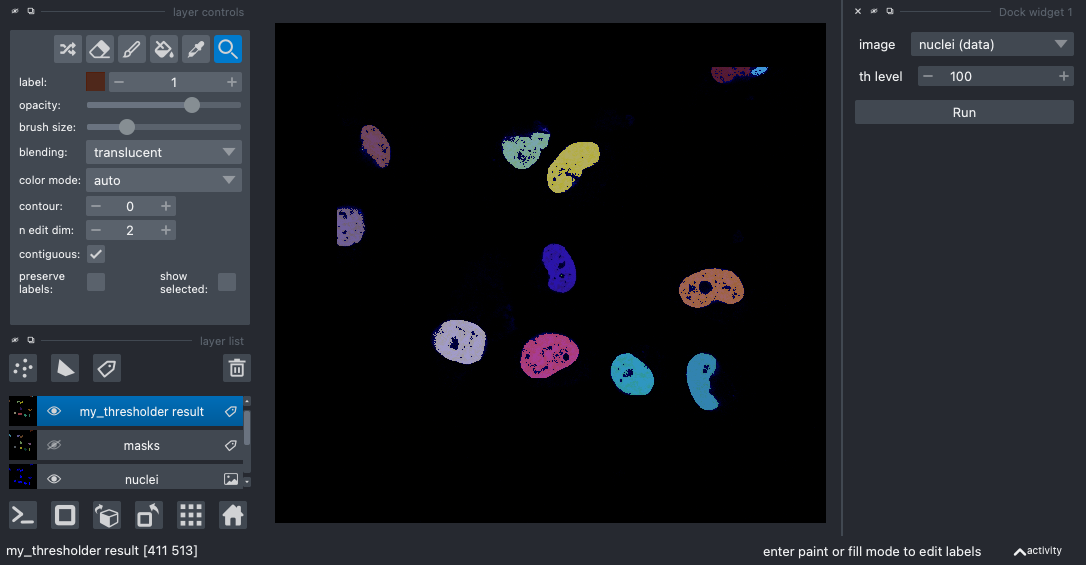

In [31]:
nbscreenshot(viewer)